In [32]:
import pandas as pd

# Path to the Parquet file
parquet_file_path = 'C:\\Users\\jaime\\Documents\\GitHub\\taxi-price-predictor\\trans_data.parquet'

# Load the Parquet file into a pandas DataFrame
df = pd.read_parquet(parquet_file_path)
df_time = pd.read_parquet(parquet_file_path)

# Display the first few rows of the DataFrame
print(df.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-05-01 00:00:36   2022-05-01 00:19:18              1.0   
1         1  2022-05-01 00:27:44   2022-05-01 00:41:33              1.0   
2         1  2022-05-01 00:59:00   2022-05-01 01:14:22              1.0   
3         1  2022-05-01 00:48:18   2022-05-01 01:28:02              1.0   
4         1  2022-05-01 00:28:26   2022-05-01 00:37:49              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            4.1         1.0                  N           246           151   
1            2.3         1.0                  N           238            74   
2            4.2         1.0                  N           163           260   
3            0.0         1.0                  N            79           182   
4            1.6         1.0                  N           238            75   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [7]:
# Calculate mean and standard deviation
mean_fare = df['fare_amount'].mean()
std_fare = df['fare_amount'].std()

# Create a new column for the standardized fare amounts
df['fare_amount_sigmas'] = (df['fare_amount'] - mean_fare) / std_fare

# Filter out rows with 'fare_amount' beyond 3 standard deviations
df = df[(df['fare_amount_sigmas'] < 3) & (df['fare_amount_sigmas'] > -3)]

# Filter out rows with non-positive 'fare_amount'
df = df[df['fare_amount'] > 0]

# Drop the 'fare_amount_sigmas' column
df.drop("fare_amount_sigmas", inplace=True, axis=1)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-05-01 00:00:36   2022-05-01 00:19:18              1.0   
1         1  2022-05-01 00:27:44   2022-05-01 00:41:33              1.0   
2         1  2022-05-01 00:59:00   2022-05-01 01:14:22              1.0   
3         1  2022-05-01 00:48:18   2022-05-01 01:28:02              1.0   
4         1  2022-05-01 00:28:26   2022-05-01 00:37:49              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            4.1         1.0                  N           246           151   
1            2.3         1.0                  N           238            74   
2            4.2         1.0                  N           163           260   
3            0.0         1.0                  N            79           182   
4            1.6         1.0                  N           238            75   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [8]:
# Ensure that 'tpep_dropoff_datetime' and 'tpep_pickup_datetime' are in datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Add the new 'duration_in_minutes' column to the DataFrame
df["duration_in_minutes"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Extract datetime components and replace original datetime columns
df["pickup_year"] = df["tpep_pickup_datetime"].dt.year
df["pickup_day"] = df["tpep_pickup_datetime"].dt.day
df["pickup_day_of_week"] = df["tpep_pickup_datetime"].dt.dayofweek
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["pickup_minute"] = df["tpep_pickup_datetime"].dt.minute

# Drop the original datetime columns
df.drop("tpep_pickup_datetime", inplace=True, axis=1)
df.drop("tpep_dropoff_datetime", inplace=True, axis=1)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

   VendorID  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0         1              1.0            4.1         1.0                  N   
1         1              1.0            2.3         1.0                  N   
2         1              1.0            4.2         1.0                  N   
3         1              1.0            0.0         1.0                  N   
4         1              1.0            1.6         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  ...  \
0           246           151             2         17.0    3.0  ...   
1           238            74             2         11.0    3.0  ...   
2           163           260             2         15.5    3.0  ...   
3            79           182             1         41.2    0.0  ...   
4           238            75             1          7.5    3.0  ...   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    

In [9]:
import numpy as np


# Ensure that 'pickup_year' is extracted and present in the DataFrame
if 'pickup_year' not in df.columns:
    df['pickup_year'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.year

# Remove rows that are not from 2022
df.loc[df["pickup_year"] != 2022, "pickup_year"] = np.nan

# Replace all rows with trip_distance > 60 because they are outliers
df.loc[df["trip_distance"] > 60, "trip_distance"] = np.nan

# Remove all rows with RatecodeID > 6 because according to docs RatecodeID can only go from 1 to 6
df.loc[df["RatecodeID"] > 6, "RatecodeID"] = np.nan

# Remove rows with PULocationID > 263 or DOLocationID > 263 because they don't add value to the model
df.loc[df["PULocationID"] > 263, "PULocationID"] = np.nan
df.loc[df["DOLocationID"] > 263, "DOLocationID"] = np.nan

# Filter out rows where total_amount is 400 or more
df = df[df['total_amount'] < 400]

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

   VendorID  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0         1              1.0            4.1         1.0                  N   
1         1              1.0            2.3         1.0                  N   
2         1              1.0            4.2         1.0                  N   
3         1              1.0            0.0         1.0                  N   
4         1              1.0            1.6         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  ...  \
0         246.0         151.0             2         17.0    3.0  ...   
1         238.0          74.0             2         11.0    3.0  ...   
2         163.0         260.0             2         15.5    3.0  ...   
3          79.0         182.0             1         41.2    0.0  ...   
4         238.0          75.0             1          7.5    3.0  ...   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    

In [10]:
# Replace None values in the 'store_and_fwd_flag' column with 'N'
df["store_and_fwd_flag"].replace({None: "N"}, inplace=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())


   VendorID  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0         1              1.0            4.1         1.0                  N   
1         1              1.0            2.3         1.0                  N   
2         1              1.0            4.2         1.0                  N   
3         1              1.0            0.0         1.0                  N   
4         1              1.0            1.6         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  ...  \
0         246.0         151.0             2         17.0    3.0  ...   
1         238.0          74.0             2         11.0    3.0  ...   
2         163.0         260.0             2         15.5    3.0  ...   
3          79.0         182.0             1         41.2    0.0  ...   
4         238.0          75.0             1          7.5    3.0  ...   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    

In [11]:
# Create copies of the DataFrame for training and testing
X_train = df.copy()
X_test = df.copy()

# Assign target columns to y_train
y_train_total_amount = X_train["total_amount"]
y_train_duration_in_minutes = X_train["duration_in_minutes"]

# Drop target columns from X_train
X_train.drop(["total_amount", "duration_in_minutes"], inplace=True, axis=1)

# Assign target columns to y_test
y_test_total_amount = X_test["total_amount"]
y_test_duration_in_minutes = X_test["duration_in_minutes"]

# Drop target columns from X_test
X_test.drop(["total_amount", "duration_in_minutes"], inplace=True, axis=1)

# Output the results
print(X_train.head())
print(y_train_total_amount.head())
print(y_train_duration_in_minutes.head())
print(X_test.head())
print(y_test_total_amount.head())
print(y_test_duration_in_minutes.head())


   VendorID  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0         1              1.0            4.1         1.0                  N   
1         1              1.0            2.3         1.0                  N   
2         1              1.0            4.2         1.0                  N   
3         1              1.0            0.0         1.0                  N   
4         1              1.0            1.6         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  ...  \
0         246.0         151.0             2         17.0    3.0  ...   
1         238.0          74.0             2         11.0    3.0  ...   
2         163.0         260.0             2         15.5    3.0  ...   
3          79.0         182.0             1         41.2    0.0  ...   
4         238.0          75.0             1          7.5    3.0  ...   

   tip_amount  tolls_amount  improvement_surcharge  congestion_surcharge  \
0        0.00         

In [12]:
X_train.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge', 'airport_fee',
       'pickup_year', 'pickup_day', 'pickup_day_of_week', 'pickup_hour',
       'pickup_minute'],
      dtype='object')

In [13]:
import pandas as pd

def remove_columns_in_place(dfs, columns_to_remove):
    """
    Remove specified columns from a list of DataFrames in place.

    Parameters:
    dfs (list of pd.DataFrame): A list of DataFrames to modify.
    columns_to_remove (list): A list of column names to remove from each DataFrame.
    """
    for i in range(len(dfs)):
        dfs[i].drop(columns=columns_to_remove, axis=1, inplace=True)

# List of columns to remove
columns_to_remove = ['improvement_surcharge',  'congestion_surcharge', 'VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'extra', 'tip_amount']

# Your DataFrames
df_list = [X_train]

# Remove columns from all DataFrames in place
remove_columns_in_place(df_list, columns_to_remove)

# Display the first few rows of the cleaned DataFrame to verify the changes
print(X_train.columns)


Index(['trip_distance', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'mta_tax', 'tolls_amount', 'airport_fee', 'pickup_year',
       'pickup_day', 'pickup_day_of_week', 'pickup_hour', 'pickup_minute'],
      dtype='object')


In [14]:
X_train.head(10)

,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,airport_fee,pickup_year,pickup_day,pickup_day_of_week,pickup_hour,pickup_minute
0,4.10,246.0,151.0,2,17.0,0.5,0.00,0.0,2022.0,1,6,0,0
1,2.30,238.0,74.0,2,11.0,0.5,0.00,0.0,2022.0,1,6,0,27
2,4.20,163.0,260.0,2,15.5,0.5,0.00,0.0,2022.0,1,6,0,59
3,0.00,79.0,182.0,1,41.2,0.5,0.00,0.0,2022.0,1,6,0,48
4,1.60,238.0,75.0,1,7.5,0.5,0.00,0.0,2022.0,1,6,0,28
5,1.87,249.0,164.0,1,9.5,0.5,0.00,0.0,2022.0,30,5,23,53
6,3.35,164.0,112.0,1,12.5,0.5,6.55,0.0,2022.0,1,6,0,7
7,2.58,79.0,68.0,1,13.0,0.5,0.00,0.0,2022.0,1,6,0,14
8,4.55,68.0,87.0,1,20.5,0.5,0.00,0.0,2022.0,1,6,0,36
9,2.70,48.0,145.0,1,11.5,0.5,0.00,0.0,2022.0,1,6,0,17


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train)
test_data = lgb.Dataset(y_test_total_amount)

# Set parameters for LightGBM
params = {
    'objective': 'regression', # Set the objective for regression problem
    'metric': 'mse', # Use mean squared error as evaluation metric
    'num_leaves': 31, # Maximum number of leaves in one tree
    'learning_rate': 0.05, # Learning rate
    'feature_fraction': 0.9, # Feature fraction (randomly select part of features on each iteration)
    'bagging_fraction': 0.8, # Bagging fraction (randomly select part of data without resampling)
    'bagging_freq': 5, # Frequency for bagging
    'verbose': 0 # Verbose level
}

# Train the model
num_round = 100 # Number of boosting rounds
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate the model
mse = mean_squared_error(y_test_total_amount, y_pred)
print('Mean Squared Error:', mse)

# Calculate R-squared
r2 = r2_score(y_test_total_amount, y_pred)
print(f"R-squared: {r2:.2f}")

In [15]:
import pandas as pd

# Function to remove specified columns from a DataFrame
def remove_columns_in_place(dfs, columns_to_remove):
    for df in dfs:
        columns_to_remove_existing = [col for col in columns_to_remove if col in df.columns]
        df.drop(columns=columns_to_remove_existing, axis=1, inplace=True)

# List of columns to remove
columns_to_remove = ['improvement_surcharge', 'congestion_surcharge', 'VendorID', 
                     'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'extra', 'tip_amount', 'fare_amount']

# Your DataFrames
df_list = [X_train, X_test]

# Remove columns from all DataFrames in place
remove_columns_in_place(df_list, columns_to_remove)

# Display the first few rows of the cleaned DataFrame to verify the changes
print(X_train.columns)

Index(['trip_distance', 'PULocationID', 'DOLocationID', 'payment_type',
       'mta_tax', 'tolls_amount', 'airport_fee', 'pickup_year', 'pickup_day',
       'pickup_day_of_week', 'pickup_hour', 'pickup_minute'],
      dtype='object')


In [17]:


# Example LightGBM training code
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import pickle
# Prepare data for LightGBM
train_data = lgb.Dataset(X_train, label=y_train_total_amount)
test_data = lgb.Dataset(X_test, label=y_test_total_amount, reference=train_data)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])
# Save the model to a pickle file
with open('lgb_model.pickle', 'wb') as model_file:
    pickle.dump(bst, model_file)

# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate the model
mse = mean_squared_error(y_test_total_amount, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test_total_amount, y_pred)
print(f"R-squared: {r2:.2f}")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 3524444, number of used features: 12
[LightGBM] [Info] Start training from score 21.391660
Mean Squared Error: 14.031039569753199
R-squared: 0.94


In [36]:
import pandas as pd
import pickle

import pandas as pd
import pickle

def load_and_predict_single(model_filename, single_instance):
    # Load the model from the pickle file
    with open(model_filename, 'rb') as model_file:
        bst = pickle.load(model_file)

    # Convert the single instance to a DataFrame with one row if it's a dictionary
    if isinstance(single_instance, dict):
        single_instance = pd.DataFrame([single_instance])
    elif isinstance(single_instance, pd.Series):
        single_instance = single_instance.to_frame().T

    # Make prediction using the loaded model
    y_pred = bst.predict(single_instance, num_iteration=bst.best_iteration)

    return y_pred[0]

# Example usage for a single test instance
single_instance_data = {
    'trip_distance': 12.10,
    'PULocationID': 132.0,
    'DOLocationID': 17.0,
    'payment_type': 2,
    'mta_tax': 0.5,
    'tolls_amount': 0,
    'airport_fee': 0,
    'pickup_year': 2022,
    'pickup_day': 1,
    'pickup_day_of_week': 2,
    'pickup_hour': 0,
    'pickup_minute': 23
}

predicted_value = load_and_predict_single('lgb_model.pickle', single_instance_data)
print(f'Predicted Value for the single instance: {predicted_value}')


Predicted Value for the single instance: 38.26224186462784


 37.0

In [32]:
X_train.head(10)

,trip_distance,PULocationID,DOLocationID,payment_type,mta_tax,tolls_amount,airport_fee,pickup_year,pickup_day,pickup_day_of_week,pickup_hour,pickup_minute
0,11.00,70.0,48.0,1,0.5,6.55,0.00,2022.0,1,2,0,25
1,4.20,170.0,226.0,1,0.5,0.00,0.00,2022.0,1,2,0,44
2,9.49,NaN,113.0,1,0.5,6.55,1.25,2022.0,1,2,0,23
3,12.10,132.0,17.0,2,0.5,0.00,1.25,2022.0,1,2,0,25
4,1.80,140.0,163.0,1,0.5,0.00,0.00,2022.0,1,2,0,23
5,2.02,148.0,158.0,1,0.5,0.00,0.00,2022.0,1,2,0,1
6,8.08,158.0,116.0,1,0.5,0.00,0.00,2022.0,1,2,0,16
7,4.30,246.0,262.0,1,0.5,0.00,0.00,2022.0,1,2,0,11
8,8.78,197.0,191.0,1,0.5,0.00,0.00,2022.0,1,2,0,21
9,1.76,48.0,186.0,1,0.5,0.00,0.00,2022.0,1,2,0,23


In [35]:
single_instance_data = {
    'trip_distance': 12.10,
    'PULocationID': 132.0,
    'DOLocationID': 17.0,
    'payment_type': 2,
    'mta_tax': 0.5,
    'tolls_amount': 0,
    'airport_fee': 0,
    'pickup_year': 2022,
    'pickup_day': 1,
    'pickup_day_of_week': 2,
    'pickup_hour': 0,
    'pickup_minute': 23
}



In [ ]:
          17.0             2         37.0   1.75

VendorID  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0         1              1.0          11.00         1.0                  N   
1         1              1.0           4.20         1.0                  N   
2         2              1.0           9.49         1.0                  N   
3         1              2.0          12.10         1.0                  N   
4         1              0.0           1.80         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  ...  \
0          70.0          48.0             1         32.0   3.00  ...   
1         170.0         226.0             1         14.0   3.00  ...   
2           NaN         113.0             1         26.0   0.50  ...   
3         132.0          17.0             2         37.0   1.75  ...   
4         140.0         163.0             1          9.0   3.00  ...   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    0.3         44.35                   2.5         0.00   
1                    0.3         17.80                   2.5         0.00   
2                    0.3         42.60                   2.5         1.25   
3                    0.3         39.55                   0.0         1.25   
4                    0.3         15.35                   2.5         0.00   

   duration_in_minutes  pickup_year  pickup_day  pickup_day_of_week  \
0            22.683333       2022.0           1                   2   
1            17.133333       2022.0           1                   2   
2            16.716667       2022.0           1                   2   
...
3            0             25  
4            0             23  

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data (assuming X and y are your original datasets)
X_train, X_test, y_train_total_amount, y_test_total_amount = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train_total_amount)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test_total_amount, y_pred)
print(f'Mean Squared Error: {mse}')


In [33]:
df_time.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0


In [34]:
import pandas as pd

# Convert pickup and dropoff times to datetime
df_time['tpep_pickup_datetime'] = pd.to_datetime(df_time['tpep_pickup_datetime'])
df_time['tpep_dropoff_datetime'] = pd.to_datetime(df_time['tpep_dropoff_datetime'])

# Calculate trip duration in seconds
df_time['trip_duration_seconds'] = (df_time['tpep_dropoff_datetime'] - df_time['tpep_pickup_datetime']).dt.total_seconds()

# Convert trip duration to hours
df_time['trip_duration_hours'] = df_time['trip_duration_seconds'] / 3600

# Calculate speed (distance divided by duration)
df_time['speed_mph'] = df_time['trip_distance'] / df_time['trip_duration_hours']

# Handle cases where trip duration is zero to avoid division by zero errors
df_time['speed_mph'] = df_time['speed_mph'].replace([float('inf'), -float('inf')], 0)

# Display the dataframe with the new speed column
print(df_time[['trip_distance', 'trip_duration_seconds', 'trip_duration_hours', 'speed_mph']].head())


   trip_distance  trip_duration_seconds  trip_duration_hours  speed_mph
0            4.1                 1122.0             0.311667  13.155080
1            2.3                  829.0             0.230278   9.987937
2            4.2                  922.0             0.256111  16.399132
3            0.0                 2384.0             0.662222   0.000000
4            1.6                  563.0             0.156389  10.230906


In [35]:
df_time.head(6)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration_seconds,trip_duration_hours,speed_mph
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.10,1.0,N,246,151,2,...,0.5,0.00,0.0,0.3,20.80,2.5,0.0,1122.0,0.311667,13.155080
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.30,1.0,N,238,74,2,...,0.5,0.00,0.0,0.3,14.80,2.5,0.0,829.0,0.230278,9.987937
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.20,1.0,N,163,260,2,...,0.5,0.00,0.0,0.3,19.30,2.5,0.0,922.0,0.256111,16.399132
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.00,1.0,N,79,182,1,...,0.5,0.00,0.0,0.3,42.00,0.0,0.0,2384.0,0.662222,0.000000
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.60,1.0,N,238,75,1,...,0.5,2.25,0.0,0.3,13.55,2.5,0.0,563.0,0.156389,10.230906
5,2,2022-04-30 23:53:47,2022-05-01 00:05:17,1.0,1.87,1.0,N,249,164,1,...,0.5,2.66,0.0,0.3,15.96,2.5,0.0,690.0,0.191667,9.756522


In [36]:


# Create copies of the DataFrame for training and testing
X_train = df_time.copy()
X_test = df_time.copy()

# Assign target column to y_train
y_train_duration_in_hours = X_train["trip_duration_hours"]

# Drop target column from X_train
X_train.drop(["trip_duration_hours"], inplace=True, axis=1)

# Assign target column to y_test
y_test_duration_in_hours = X_test["trip_duration_hours"]

# Drop target column from X_test
X_test.drop(["trip_duration_hours"], inplace=True, axis=1)

# Output the results
print(X_train.head())
print(y_train_duration_in_hours.head())
print(X_test.head())
print(y_test_duration_in_hours.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-05-01 00:00:36   2022-05-01 00:19:18              1.0   
1         1  2022-05-01 00:27:44   2022-05-01 00:41:33              1.0   
2         1  2022-05-01 00:59:00   2022-05-01 01:14:22              1.0   
3         1  2022-05-01 00:48:18   2022-05-01 01:28:02              1.0   
4         1  2022-05-01 00:28:26   2022-05-01 00:37:49              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            4.1         1.0                  N           246           151   
1            2.3         1.0                  N           238            74   
2            4.2         1.0                  N           163           260   
3            0.0         1.0                  N            79           182   
4            1.6         1.0                  N           238            75   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0       

In [26]:
# Function to remove specified columns from a DataFrame
def remove_columns_in_place(dfs, columns_to_remove):
    for df in dfs:
        columns_to_remove_existing = [col for col in columns_to_remove if col in df.columns]
        df.drop(columns=columns_to_remove_existing, axis=1, inplace=True)

# List of columns to remove
columns_to_remove = ['improvement_surcharge', 'congestion_surcharge', 'VendorID', 
                     'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'extra', 'tip_amount', 'fare_amount']

# Your DataFrames
df_time = [X_train, X_test]

# Remove columns from all DataFrames in place
remove_columns_in_place(df_time, columns_to_remove)

# Display the first few rows of the cleaned DataFrame to verify the changes
print(X_train.columns)

Index(['trip_distance', 'PULocationID', 'DOLocationID', 'payment_type',
       'mta_tax', 'tolls_amount', 'total_amount', 'airport_fee',
       'trip_duration_seconds', 'speed_mph'],
      dtype='object')


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# LightGBM Regressor
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

# XGBoost Regressor
xgbr = xgb.XGBRegressor(random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)

# Print the results
print(f"Linear Regression - R2: {r2_lr:.4f}, MSE: {mse_lr:.4f}")
print(f"Decision Tree Regressor - R2: {r2_dt:.4f}, MSE: {mse_dt:.4f}")
print(f"LightGBM Regressor - R2: {r2_lgbm:.4f}, MSE: {mse_lgbm:.4f}")
print(f"XGBoost Regressor - R2: {r2_xgbr:.4f}, MSE: {mse_xgbr:.4f}")



ValueError: could not convert string to float: 'N'

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# Assuming df_time already has 'trip_duration_hours' and other features

# Drop datetime columns from the feature set
X = df_time.drop(columns=['trip_duration_hours', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y = df_time['trip_duration_hours']

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill NaN values with the median of each column
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Train and evaluate the models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# LightGBM Regressor
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

# XGBoost Regressor
xgbr = xgb.XGBRegressor(random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)

# Print the results
print(f"Linear Regression - R2: {r2_lr:.4f}, MSE: {mse_lr:.4f}")
print(f"Decision Tree Regressor - R2: {r2_dt:.4f}, MSE: {mse_dt:.4f}")
print(f"LightGBM Regressor - R2: {r2_lgbm:.4f}, MSE: {mse_lgbm:.4f}")
print(f"XGBoost Regressor - R2: {r2_xgbr:.4f}, MSE: {mse_xgbr:.4f}")


AttributeError: 'list' object has no attribute 'drop'

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# Assuming df_time is a DataFrame that already has 'trip_duration_hours' and other features

# Make sure df_time is a DataFrame
if isinstance(df_time, list):
    raise ValueError("df_time should be a DataFrame, but it is a list")

# Drop datetime columns from the feature set
X = df_time.drop(columns=['trip_duration_hours', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y = df_time['trip_duration_hours']

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill NaN values with the median of each column
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Train and evaluate the models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# LightGBM Regressor
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

# XGBoost Regressor
xgbr = xgb.XGBRegressor(random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)

# Print the results
print(f"Linear Regression - R2: {r2_lr:.4f}, MSE: {mse_lr:.4f}")
print(f"Decision Tree Regressor - R2: {r2_dt:.4f}, MSE: {mse_dt:.4f}")
print(f"LightGBM Regressor - R2: {r2_lgbm:.4f}, MSE: {mse_lgbm:.4f}")
print(f"XGBoost Regressor - R2: {r2_xgbr:.4f}, MSE: {mse_xgbr:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.182743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2058
[LightGBM] [Info] Number of data points in the train set: 2870636, number of used features: 19
[LightGBM] [Info] Start training from score 0.303664
Linear Regression - R2: 1.0000, MSE: 0.0000
Decision Tree Regressor - R2: 0.9999, MSE: 0.0001
LightGBM Regressor - R2: 0.9561, MSE: 0.0322
XGBoost Regressor - R2: 0.9525, MSE: 0.0348


In [38]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to get a better estimate of model performance
lr_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print(f"Linear Regression - Cross-validated R2: {np.mean(lr_scores):.4f}")

dt_scores = cross_val_score(dt, X, y, cv=5, scoring='r2')
print(f"Decision Tree Regressor - Cross-validated R2: {np.mean(dt_scores):.4f}")

lgbm_scores = cross_val_score(lgbm, X, y, cv=5, scoring='r2')
print(f"LightGBM Regressor - Cross-validated R2: {np.mean(lgbm_scores):.4f}")

xgbr_scores = cross_val_score(xgbr, X, y, cv=5, scoring='r2')
print(f"XGBoost Regressor - Cross-validated R2: {np.mean(xgbr_scores):.4f}")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jaime\anaconda3\envs\scraping1\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jaime\anaconda3\envs\scraping1\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\jaime\anaconda3\envs\scraping1\lib\site-packages\sklearn\linear_model\_base.py", line 578, in fit
    X, y = self._validate_data(
  File "c:\Users\jaime\anaconda3\envs\scraping1\lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\jaime\anaconda3\envs\scraping1\lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
  File "c:\Users\jaime\anaconda3\envs\scraping1\lib\site-packages\sklearn\utils\validation.py", line 1049, in check_array
    _assert_all_finite(
  File "c:\Users\jaime\anaconda3\envs\scraping1\lib\site-packages\sklearn\utils\validation.py", line 126, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\jaime\anaconda3\envs\scraping1\lib\site-packages\sklearn\utils\validation.py", line 175, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# Assuming df_time is a DataFrame that already has 'trip_duration_hours' and other features

# Make sure df_time is a DataFrame
if isinstance(df_time, list):
    raise ValueError("df_time should be a DataFrame, but it is a list")

# Drop datetime columns from the feature set
X = df_time.drop(columns=['trip_duration_hours', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y = df_time['trip_duration_hours']

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Fill NaN values with the median of each column
X.fillna(X.median(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# LightGBM Regressor
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

# XGBoost Regressor
xgbr = xgb.XGBRegressor(random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)

# Print the results
print(f"Linear Regression - R2: {r2_lr:.4f}, MSE: {mse_lr:.4f}")
print(f"Decision Tree Regressor - R2: {r2_dt:.4f}, MSE: {mse_dt:.4f}")
print(f"LightGBM Regressor - R2: {r2_lgbm:.4f}, MSE: {mse_lgbm:.4f}")
print(f"XGBoost Regressor - R2: {r2_xgbr:.4f}, MSE: {mse_xgbr:.4f}")

# Perform cross-validation to get a better estimate of model performance
lr_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print(f"Linear Regression - Cross-validated R2: {np.mean(lr_scores):.4f}")

dt_scores = cross_val_score(dt, X, y, cv=5, scoring='r2')
print(f"Decision Tree Regressor - Cross-validated R2: {np.mean(dt_scores):.4f}")

lgbm_scores = cross_val_score(lgbm, X, y, cv=5, scoring='r2')
print(f"LightGBM Regressor - Cross-validated R2: {np.mean(lgbm_scores):.4f}")

xgbr_scores = cross_val_score(xgbr, X, y, cv=5, scoring='r2')
print(f"XGBoost Regressor - Cross-validated R2: {np.mean(xgbr_scores):.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.110506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2058
[LightGBM] [Info] Number of data points in the train set: 2870636, number of used features: 19
[LightGBM] [Info] Start training from score 0.303664
Linear Regression - R2: 1.0000, MSE: 0.0000
Decision Tree Regressor - R2: 0.9999, MSE: 0.0001
LightGBM Regressor - R2: 0.9561, MSE: 0.0322
XGBoost Regressor - R2: 0.9525, MSE: 0.0348
Linear Regression - Cross-validated R2: 1.0000
Decision Tree Regressor - Cross-validated R2: 0.9981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.140647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2128
[LightGBM] [Info] Number of data points in the tr


Linear Regression - R2: 1.0000, MSE: 0.0000
Decision Tree Regressor - R2: 0.9999, MSE: 0.0001
LightGBM Regressor - R2: 0.9561, MSE: 0.0322
XGBoost Regressor - R2: 0.9525, MSE: 0.0348
Linear Regression - Cross-validated R2: 1.0000
Decision Tree Regressor - Cross-validated R2: 0.9981
LightGBM Regressor - Cross-validated R2: 0.9423
XGBoost Regressor - Cross-validated R2: 0.9406

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2058
[LightGBM] [Info] Number of data points in the train set: 2870636, number of used features: 19
[LightGBM] [Info] Start training from score 0.303664
Linear Regression - R2: 1.0000, MSE: 0.0000
Decision Tree Regressor - R2: 0.9999, MSE: 0.0001
LightGBM Regressor - R2: 0.9561, MSE: 0.0322
XGBoost Regressor - R2: 0.9525, MSE: 0.0348
Linear Regression - Cross-validated R2: 1.0000
Decision Tree Regressor - Cross-validated R2: 0.9981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2128
[LightGBM] [Info] Number of data points in the tr

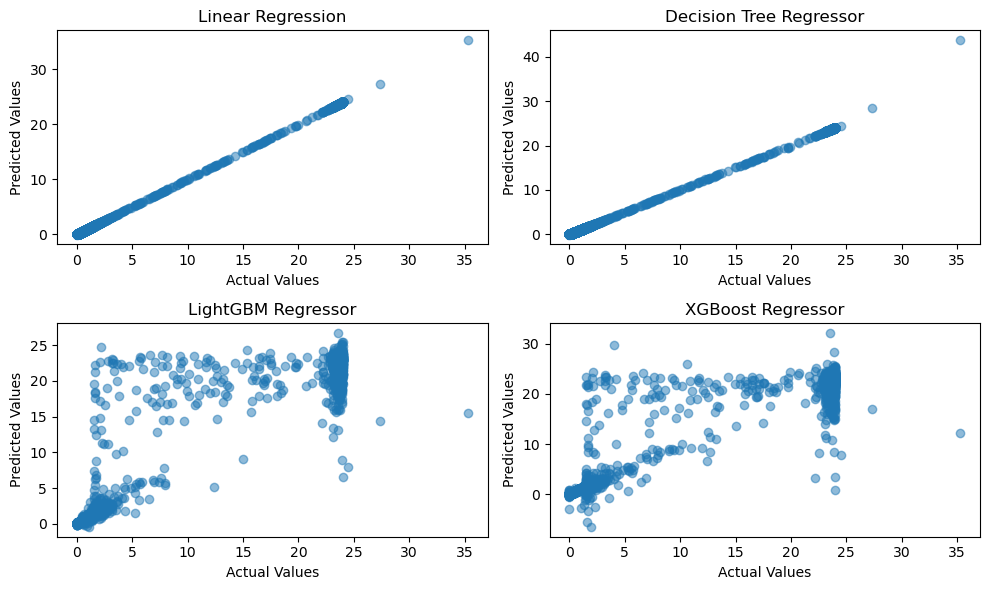

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Ensure df_time is a DataFrame
if isinstance(df_time, list):
    raise ValueError("df_time should be a DataFrame, but it is a list")

# Drop datetime columns from the feature set
X = df_time.drop(columns=['trip_duration_hours', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y = df_time['trip_duration_hours']

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Fill NaN values with the median of each column
X.fillna(X.median(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# LightGBM Regressor
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

# XGBoost Regressor
xgbr = xgb.XGBRegressor(random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)

# Print the results
print(f"Linear Regression - R2: {r2_lr:.4f}, MSE: {mse_lr:.4f}")
print(f"Decision Tree Regressor - R2: {r2_dt:.4f}, MSE: {mse_dt:.4f}")
print(f"LightGBM Regressor - R2: {r2_lgbm:.4f}, MSE: {mse_lgbm:.4f}")
print(f"XGBoost Regressor - R2: {r2_xgbr:.4f}, MSE: {mse_xgbr:.4f}")

# Perform cross-validation to get a better estimate of model performance
lr_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print(f"Linear Regression - Cross-validated R2: {np.mean(lr_scores):.4f}")

dt_scores = cross_val_score(dt, X, y, cv=5, scoring='r2')
print(f"Decision Tree Regressor - Cross-validated R2: {np.mean(dt_scores):.4f}")

lgbm_scores = cross_val_score(lgbm, X, y, cv=5, scoring='r2')
print(f"LightGBM Regressor - Cross-validated R2: {np.mean(lgbm_scores):.4f}")

xgbr_scores = cross_val_score(xgbr, X, y, cv=5, scoring='r2')
print(f"XGBoost Regressor - Cross-validated R2: {np.mean(xgbr_scores):.4f}")

# Check for data leakage
assert not X_train.index.intersection(X_test.index).any()

# Examine the target variable
print(y.describe())

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.title('Decision Tree Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_lgbm, alpha=0.5)
plt.title('LightGBM Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_xgbr, alpha=0.5)
plt.title('XGBoost Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle

# Ensure df_time is a DataFrame
if isinstance(df_time, list):
    raise ValueError("df_time should be a DataFrame, but it is a list")

# Drop datetime columns from the feature set
X = df_time.drop(columns=['trip_duration_hours', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y = df_time['trip_duration_hours']

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Fill NaN values with the median of each column
X.fillna(X.median(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Save the model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Save the model
with open('decision_tree_regressor_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

# LightGBM Regressor
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

# Save the model
with open('lightgbm_regressor_model.pkl', 'wb') as file:
    pickle.dump(lgbm, file)

# XGBoost Regressor
xgbr = xgb.XGBRegressor(random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)

# Save the model
with open('xgboost_regressor_model.pkl', 'wb') as file:
    pickle.dump(xgbr, file)

# Print the results
print(f"Linear Regression - R2: {r2_lr:.4f}, MSE: {mse_lr:.4f}")
print(f"Decision Tree Regressor - R2: {r2_dt:.4f}, MSE: {mse_dt:.4f}")
print(f"LightGBM Regressor - R2: {r2_lgbm:.4f}, MSE: {mse_lgbm:.4f}")
print(f"XGBoost Regressor - R2: {r2_xgbr:.4f}, MSE: {mse_xgbr:.4f}")

# Perform cross-validation to get a better estimate of model performance
lr_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print(f"Linear Regression - Cross-validated R2: {np.mean(lr_scores):.4f}")

dt_scores = cross_val_score(dt, X, y, cv=5, scoring='r2')
print(f"Decision Tree Regressor - Cross-validated R2: {np.mean(dt_scores):.4f}")

lgbm_scores = cross_val_score(lgbm, X, y, cv=5, scoring='r2')
print(f"LightGBM Regressor - Cross-validated R2: {np.mean(lgbm_scores):.4f}")

xgbr_scores = cross_val_score(xgbr, X, y, cv=5, scoring='r2')
print(f"XGBoost Regressor - Cross-validated R2: {np.mean(xgbr_scores):.4f}")




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.117446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2058
[LightGBM] [Info] Number of data points in the train set: 2870636, number of used features: 19
[LightGBM] [Info] Start training from score 0.303664
Linear Regression - R2: 1.0000, MSE: 0.0000
Decision Tree Regressor - R2: 0.9999, MSE: 0.0001
LightGBM Regressor - R2: 0.9561, MSE: 0.0322
XGBoost Regressor - R2: 0.9525, MSE: 0.0348
Linear Regression - Cross-validated R2: 1.0000
Decision Tree Regressor - Cross-validated R2: 0.9981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.136815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2128
[LightGBM] [Info] Number of data points in the tr

In [42]:
# Load the saved Linear Regression model
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_lr = pickle.load(file)

# Make predictions with the loaded model
loaded_lr_predictions = loaded_lr.predict(X_test)
print(f"Loaded Linear Regression - R2: {r2_score(y_test, loaded_lr_predictions):.4f}, MSE: {mean_squared_error(y_test, loaded_lr_predictions):.4f}")

# Load the saved Decision Tree Regressor model
with open('decision_tree_regressor_model.pkl', 'rb') as file:
    loaded_dt = pickle.load(file)

# Make predictions with the loaded model
loaded_dt_predictions = loaded_dt.predict(X_test)
print(f"Loaded Decision Tree Regressor - R2: {r2_score(y_test, loaded_dt_predictions):.4f}, MSE: {mean_squared_error(y_test, loaded_dt_predictions):.4f}")

# Load the saved LightGBM Regressor model
with open('lightgbm_regressor_model.pkl', 'rb') as file:
    loaded_lgbm = pickle.load(file)

# Make predictions with the loaded model
loaded_lgbm_predictions = loaded_lgbm.predict(X_test)
print(f"Loaded LightGBM Regressor - R2: {r2_score(y_test, loaded_lgbm_predictions):.4f}, MSE: {mean_squared_error(y_test, loaded_lgbm_predictions):.4f}")

# Load the saved XGBoost Regressor model
with open('xgboost_regressor_model.pkl', 'rb') as file:
    loaded_xgbr = pickle.load(file)

# Make predictions with the loaded model
loaded_xgbr_predictions = loaded_xgbr.predict(X_test)
print(f"Loaded XGBoost Regressor - R2: {r2_score(y_test, loaded_xgbr_predictions):.4f}, MSE: {mean_squared_error(y_test, loaded_xgbr_predictions):.4f}")


Loaded Linear Regression - R2: 1.0000, MSE: 0.0000
Loaded Decision Tree Regressor - R2: 0.9999, MSE: 0.0001
Loaded LightGBM Regressor - R2: 0.9561, MSE: 0.0322
Loaded XGBoost Regressor - R2: 0.9525, MSE: 0.0348


In [43]:
X_train.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration_seconds,speed_mph,store_and_fwd_flag_Y
2667519,2,1.0,1.52,1.0,263,162,2,13.0,0.0,0.5,0.00,0.0,0.3,16.30,2.5,0.0,1222.0,4.477905,False
523312,2,1.0,0.63,1.0,186,234,1,5.5,0.5,0.5,3.00,0.0,0.3,12.30,2.5,0.0,326.0,6.957055,False
1508410,1,1.0,1.70,1.0,142,141,1,10.0,2.5,0.5,3.30,0.0,0.3,16.60,2.5,0.0,786.0,7.786260,False
3277127,2,1.0,2.00,1.0,162,186,1,9.0,0.0,0.5,2.46,0.0,0.3,14.76,2.5,0.0,621.0,11.594203,False
977674,1,1.0,1.30,1.0,186,246,1,7.0,3.0,0.5,0.00,0.0,0.3,10.80,2.5,0.0,373.0,12.546917,False


In [ ]:
import pandas as pd
import pickle


def load_and_predict_single(model_filename, single_instance):
    # Load the model from the pickle file
    with open(model_filename, 'rb') as model_file:
        bst = pickle.load(model_file)

    # Convert the single instance to a DataFrame with one row if it's a dictionary
    if isinstance(single_instance, dict):
        single_instance = pd.DataFrame([single_instance])
    elif isinstance(single_instance, pd.Series):
        single_instance = single_instance.to_frame().T

    # Make prediction using the loaded model
    y_pred = bst.predict(single_instance, num_iteration=bst.best_iteration)

    return y_pred[0]

# Example usage for a single test instance
single_instance_data = {
    'trip_distance': 12.10,
    'PULocationID': 132.0,
    'DOLocationID': 17.0,
    'payment_type': 2,
    'mta_tax': 0.5,
    'tolls_amount': 0,
    'airport_fee': 0,
    'pickup_year': 2022,
    'pickup_day': 1,
    'pickup_day_of_week': 2,
    'pickup_hour': 0,
    'pickup_minute': 23
}

predicted_value = load_and_predict_single('lgb_model.pickle', single_instance_data)
print(f'Predicted Value for the single instance: {predicted_value}')
